Logistic Regression

Supervised learning - Addreses classfication and predictive analytics problem (Predict outcome with high probability)

-Linearly seperable
-Mathematically a Sigmoid function (S function) f(x)= 1/ (1+e^-x)  (probaility of success / probability of failure),  which maps data or x values between 0 and 1 
-Converts continous data into probabaility of categories (discrete values) !

Types : 
* Binary logistic regression - 2 possible outcomes (Eg : When we do fatigue analysis for Unidirectional load and evaluate failures as per Haigh / Goodmann diagram)
* Multinomial logistic regression -  More than 2 possible outcomes but not in order (Eg : For different temperatures and youngs modulus , the material strength changes . To classfiy the failures based on strangth ranges is a multiple outcome)
* Ordinal logistic regression -  More than 2 possible outcomes but have defined order (Eg : With the same material strenght if we sort the fatigue cycles based on region below endurance strength, region between yield and endurance and region between ultimate and yield)

Geometric Intuition

Decision Boundary - The line or curve that separates the two classes in the feature space. In other words, it is the boundary that separates the regions of the feature space where each class is assigned.

Logistic regression finds a hyperplane in the feature space that separates the two classes. Points on one side of the hyperplane are classified as one class, and points on the other side as the opposite class.
For example:
In 2D, the hyperplane is a line.
In 3D, the hyperplane is a plane.

Visualizing the Sigmoid Function...


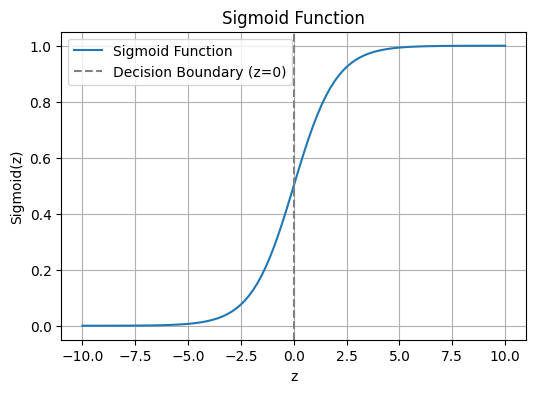

Creating Dataset and Plotting Decision Boundary...


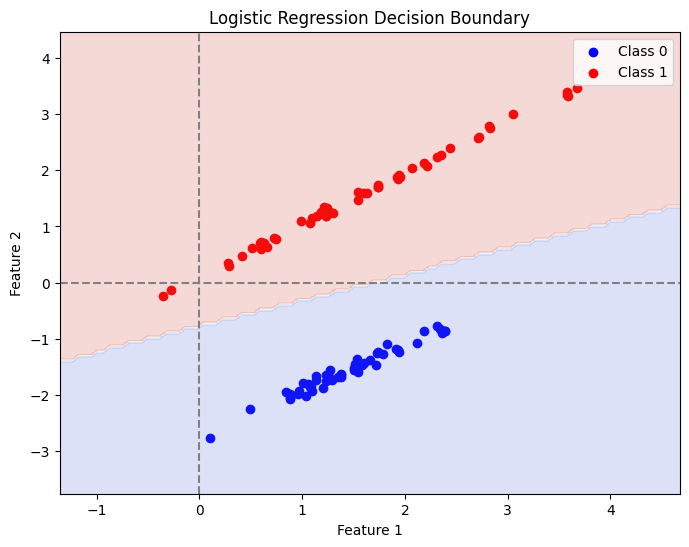

In [2]:
#impoorting libraries

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

# Function to demonstrate the sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


# Plot the sigmoid function
def plot_sigmoid():
    z = np.linspace(-10, 10, 100)
    y = sigmoid(z)
    
    plt.figure(figsize=(6, 4))
    plt.plot(z, y, label='Sigmoid Function')
    plt.axvline(0, color='gray', linestyle='--', label='Decision Boundary (z=0)')
    plt.title("Sigmoid Function")
    plt.xlabel("z")
    plt.ylabel("Sigmoid(z)")
    plt.legend()
    plt.grid()
    plt.show()

# Generate a synthetic dataset
def create_dataset():
    X, y = make_classification(
        n_samples=100, n_features=2, n_informative=2, n_redundant=0, 
        n_clusters_per_class=1, class_sep=1.5, random_state=42
    )
    return X, y

# Train logistic regression and plot decision boundary
def plot_decision_boundary(X, y):
    # Train logistic regression
    model = LogisticRegression()
    model.fit(X, y)
    
    # Plot the dataset
    plt.figure(figsize=(8, 6))
    plt.scatter(X[y == 0, 0], X[y == 0, 1], color='blue', label='Class 0')
    plt.scatter(X[y == 1, 0], X[y == 1, 1], color='red', label='Class 1')
    
    # Plot the decision boundary
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.2, cmap='coolwarm')
    plt.axhline(0, color='gray', linestyle='--')
    plt.axvline(0, color='gray', linestyle='--')
    plt.title("Logistic Regression Decision Boundary")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.show()

# Main function
def main():
    # Plot the sigmoid function
    print("Visualizing the Sigmoid Function...")
    plot_sigmoid()
    
    # Create dataset and visualize decision boundary
    print("Creating Dataset and Plotting Decision Boundary...")
    X, y = create_dataset()
    plot_decision_boundary(X, y)

# Run the main function
if __name__ == "__main__":
    main()


Generating Haigh Diagram Data...
Plotting Haigh Diagram with Decision Boundary...
Model Accuracy: 100.00%


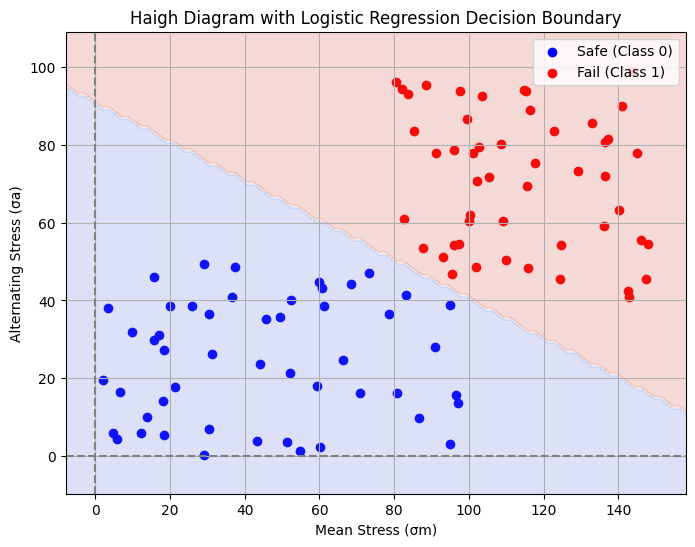

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Generate synthetic data for Haigh Diagram
def generate_haigh_data():
    np.random.seed(42)
    # Safe points
    sigma_m_safe = np.random.uniform(0, 100, 50)
    sigma_a_safe = np.random.uniform(0, 50, 50)
    safe_labels = np.zeros(50)
    
    # Fail points
    sigma_m_fail = np.random.uniform(80, 150, 50)
    sigma_a_fail = np.random.uniform(40, 100, 50)
    fail_labels = np.ones(50)
    
    # Combine data
    sigma_m = np.concatenate([sigma_m_safe, sigma_m_fail])
    sigma_a = np.concatenate([sigma_a_safe, sigma_a_fail])
    labels = np.concatenate([safe_labels, fail_labels])
    
    # Create feature matrix
    X = np.column_stack((sigma_m, sigma_a))
    y = labels
    return X, y

# Train logistic regression and plot Haigh Diagram
def plot_haigh_diagram(X, y):
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Train logistic regression
    model = LogisticRegression()
    model.fit(X_train, y_train)
    
    # Test accuracy
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Model Accuracy: {accuracy * 100:.2f}%")
    
    # Plot data points
    plt.figure(figsize=(8, 6))
    plt.scatter(X[y == 0, 0], X[y == 0, 1], color='blue', label='Safe (Class 0)')
    plt.scatter(X[y == 1, 0], X[y == 1, 1], color='red', label='Fail (Class 1)')
    
    # Plot decision boundary
    x_min, x_max = X[:, 0].min() - 10, X[:, 0].max() + 10
    y_min, y_max = X[:, 1].min() - 10, X[:, 1].max() + 10
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.2, cmap='coolwarm')
    plt.axhline(0, color='gray', linestyle='--')
    plt.axvline(0, color='gray', linestyle='--')
    plt.title("Haigh Diagram with Logistic Regression Decision Boundary")
    plt.xlabel("Mean Stress (σm)")
    plt.ylabel("Alternating Stress (σa)")
    plt.legend()
    plt.grid()
    plt.show()

# Main function
def main():
    # Generate data for Haigh diagram
    print("Generating Haigh Diagram Data...")
    X, y = generate_haigh_data()
    
    # Plot the Haigh diagram
    print("Plotting Haigh Diagram with Decision Boundary...")
    plot_haigh_diagram(X, y)

# Run the main function
if __name__ == "__main__":
    main()


Topics to be updated : 
Assumptions
Mathematical intutiion
Performance improvement - Regularisation
Model performance / goodness of fit (Accuracy precision Recall F1 score AUC-ROC)